In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Carregar dataset preparado
df = pd.read_csv('Dados/dataset_olist_preparado.csv', parse_dates=['order_purchase_timestamp'])

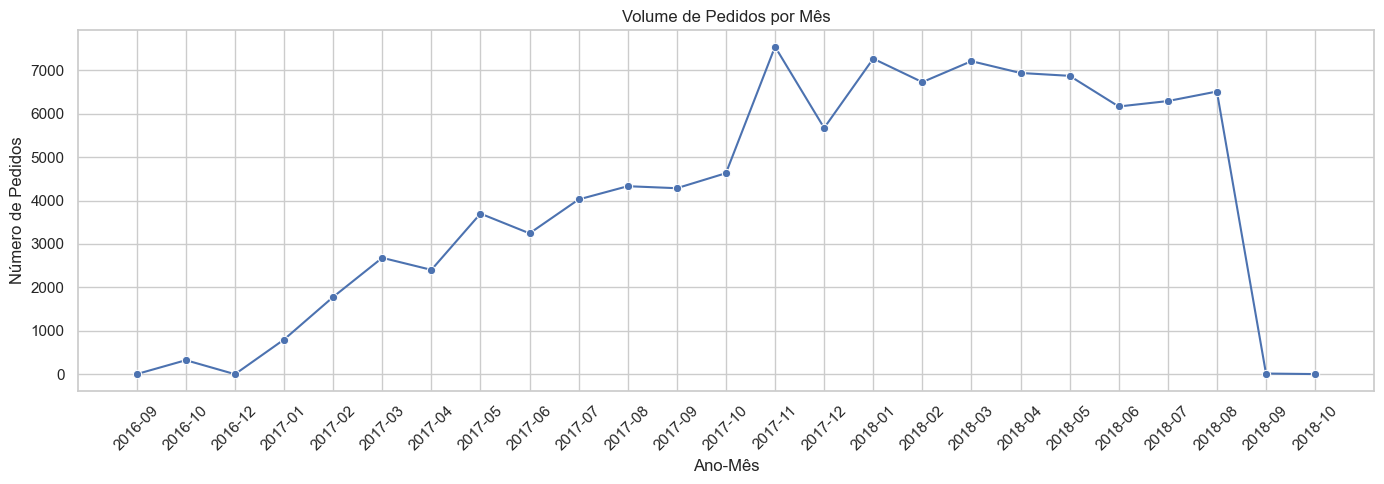

In [2]:
# Criar coluna ano-mês
df['ano_mes'] = df['order_purchase_timestamp'].dt.to_period('M')

# Contar pedidos por mês
pedidos_mes = df.groupby('ano_mes')['order_id'].nunique().reset_index()
pedidos_mes['ano_mes'] = pedidos_mes['ano_mes'].astype(str)

# Plotar
plt.figure(figsize=(14,5))
sns.lineplot(data=pedidos_mes, x='ano_mes', y='order_id', marker='o')
plt.xticks(rotation=45)
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Pedidos')
plt.tight_layout()
plt.show()

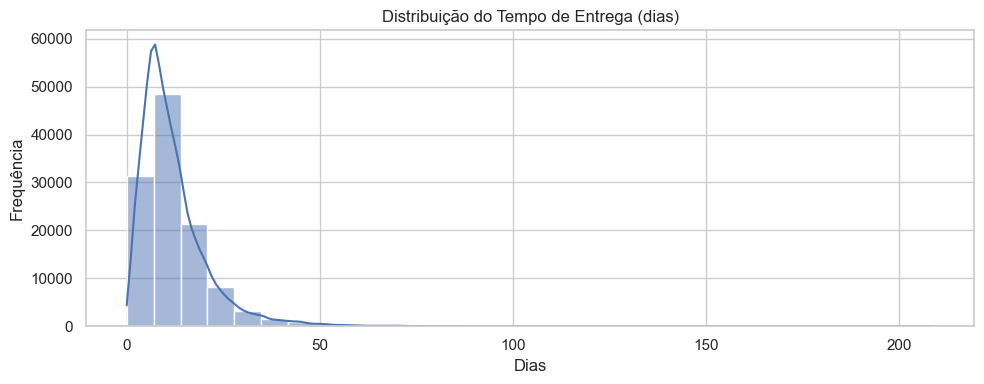

In [3]:
# Calcular tempo de entrega em dias
df['tempo_entrega'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days

# Plotar distribuição
plt.figure(figsize=(10,4))
sns.histplot(df['tempo_entrega'].dropna(), bins=30, kde=True)
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


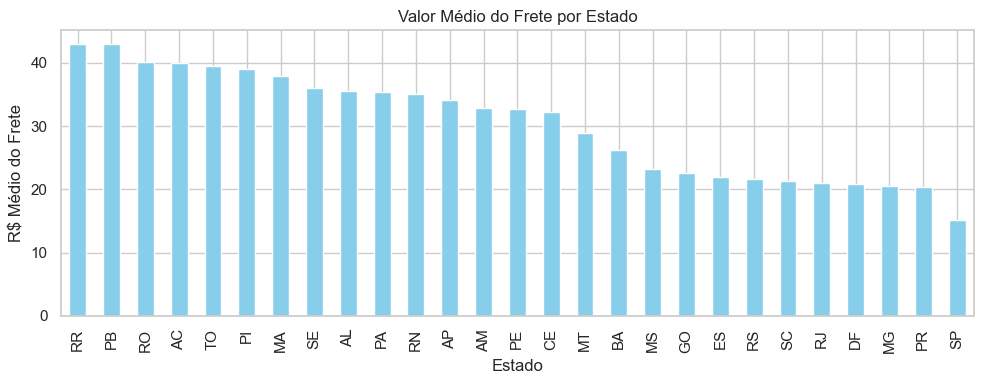

In [4]:
# Calcular frete médio por UF (cliente vs vendedor)
df['freight_value'] = df['freight_value'].fillna(0)
media_frete_por_estado = df.groupby(['customer_state'])['freight_value'].mean().sort_values(ascending=False)

# Exemplo de visualização
plt.figure(figsize=(10,4))
media_frete_por_estado.plot(kind='bar', color='skyblue')
plt.title('Valor Médio do Frete por Estado')
plt.xlabel('Estado')
plt.ylabel('R$ Médio do Frete')
plt.tight_layout()
plt.show()

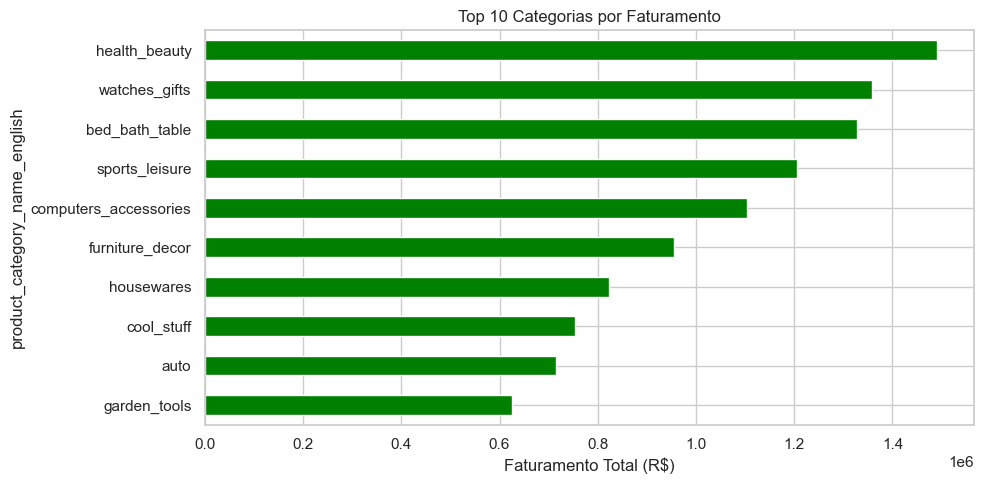

In [5]:
df['total_item'] = df['price'] + df['freight_value']

faturamento_categoria = df.groupby('product_category_name_english')['total_item'].sum().sort_values(ascending=False).head(10)

# Plotar
plt.figure(figsize=(10,5))
faturamento_categoria.plot(kind='barh', color='green')
plt.title('Top 10 Categorias por Faturamento')
plt.xlabel('Faturamento Total (R$)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


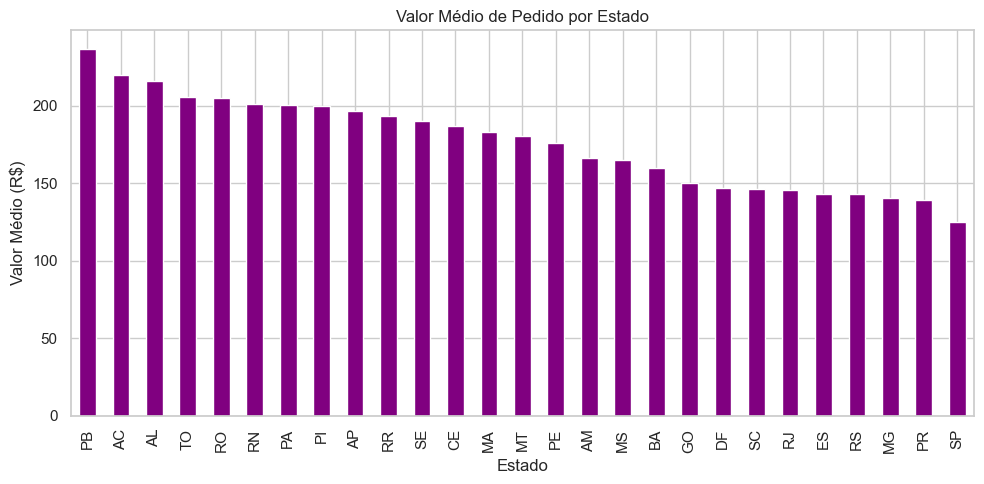

In [6]:
valor_medio_estado = df.groupby('customer_state')['total_item'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
valor_medio_estado.plot(kind='bar', color='purple')
plt.title('Valor Médio de Pedido por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor Médio (R$)')
plt.tight_layout()
plt.show()
